In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
df=pd.read_csv("Football.csv")
df.sort_values('fifa_ranking_2024').head(10) 

,Unnamed: 0,team,fifa_ranking_2024,world_cups_won,finals_reached,wc_2022_performance,recent_wins_2023_24,avg_goals_per_game_recent,avg_goals_conceded_recent,continental_titles_recent,squad_value_millions_2024,elo_rating_2024,winner_potential
0,0,Argentina,1,3,6,1,12,2.3,0.8,1,1100,2100,1
1,1,France,2,2,4,2,10,2.1,1.0,0,1300,2080,1
4,4,Belgium,3,0,0,3,7,1.6,1.2,0,800,1950,0
3,3,England,4,1,1,8,9,1.8,0.9,1,1500,1980,1
2,2,Brazil,5,5,7,5,8,1.9,1.1,1,1200,2000,1
6,6,Portugal,6,0,0,8,9,2.2,1.1,1,1000,1990,0
5,5,Netherlands,7,0,3,8,8,2.0,1.0,1,900,1970,0
7,7,Spain,8,1,1,16,11,1.7,0.7,1,1000,1960,0
8,8,Italy,9,4,6,16,6,1.5,0.9,1,700,1940,0
9,9,Croatia,10,0,1,3,7,1.4,1.0,1,450,1920,0


In [5]:

def classify_winner_potential_updated(row):
    score = 0
    
    # Current FIFA ranking (lower is better)
    if row['fifa_ranking_2024'] <= 3:
        score += 4
    elif row['fifa_ranking_2024'] <= 6:
        score += 3
    elif row['fifa_ranking_2024'] <= 10:
        score += 2
    elif row['fifa_ranking_2024'] <= 15:
        score += 1
    
    # World Cups won (historical success)
    if row['world_cups_won'] >= 4:
        score += 3
    elif row['world_cups_won'] >= 2:
        score += 2
    elif row['world_cups_won'] >= 1:
        score += 1
    
    # 2022 World Cup performance (recent major tournament success)
    if row['wc_2022_performance'] <= 2:  # Winner or runner-up
        score += 3
    elif row['wc_2022_performance'] <= 4:  # Semi-finalist
        score += 2
    elif row['wc_2022_performance'] <= 8:  # Quarter-finalist
        score += 1
    
    # Recent form (2023-2024)
    if row['recent_wins_2023_24'] >= 10:
        score += 2
    elif row['recent_wins_2023_24'] >= 8:
        score += 1
    
    # Squad value (current market strength)
    if row['squad_value_millions_2024'] >= 1200:
        score += 2
    elif row['squad_value_millions_2024'] >= 900:
        score += 1
    
    # ELO rating (comprehensive strength measure)
    if row['elo_rating_2024'] >= 2050:
        score += 2
    elif row['elo_rating_2024'] >= 1950:
        score += 1
    
    # Return 1 if strong potential winner (score >= 8), 0 otherwise
    return 1 if score >= 8 else 0

# Apply the updated classification to the new dataset
df['winner_potential'] = df.apply(classify_winner_potential_updated, axis=1)

print("Teams classified by winner potential):")
print(df[['team', 'fifa_ranking_2024', 'winner_potential']].sort_values('winner_potential', ascending=False)) 

Teams classified by winner potential):
           team  fifa_ranking_2024  winner_potential
0     Argentina                  1                 1
1        France                  2                 1
2        Brazil                  5                 1
3       England                  4                 1
4       Belgium                  3                 0
5   Netherlands                  7                 0
6      Portugal                  6                 0
7         Spain                  8                 0
8         Italy                  9                 0
9       Croatia                 10                 0
10      Uruguay                 11                 0
11          USA                 12                 0
12      Morocco                 15                 0
13      Germany                 13                 0
14        Japan                 18                 0
15       Mexico                 17                 0


In [8]:


feature_columns_updated = ['fifa_ranking_2024', 'world_cups_won', 'finals_reached', 
                          'wc_2022_performance', 'recent_wins_2023_24', 'avg_goals_per_game_recent', 
                          'avg_goals_conceded_recent', 'squad_value_millions_2024', 'elo_rating_2024']

X_updated = df[feature_columns_updated]
y_updated = df['winner_potential']

print("Updated features selected for the model (2024 data):")
print(X_updated.head())
print(f"\nTarget variable distribution:")
print(f"Potential winners: {sum(y_updated)} teams")
print(f"Non-potential winners: {len(y_updated) - sum(y_updated)} teams")
print(f"\nTeams classified as potential winners:")
winner_teams = df[df['winner_potential'] == 1]['team'].tolist()
print(winner_teams) 

Updated features selected for the model (2024 data):
   fifa_ranking_2024  world_cups_won  finals_reached  wc_2022_performance  \
0                  1               3               6                    1   
1                  2               2               4                    2   
2                  5               5               7                    5   
3                  4               1               1                    8   
4                  3               0               0                    3   

   recent_wins_2023_24  avg_goals_per_game_recent  avg_goals_conceded_recent  \
0                   12                        2.3                        0.8   
1                   10                        2.1                        1.0   
2                    8                        1.9                        1.1   
3                    9                        1.8                        0.9   
4                    7                        1.6                        1.2   

   

In [11]:



rf_model_updated = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model_updated.fit(X_updated, y_updated)


predictions_updated = rf_model_updated.predict(X_updated)
prediction_probabilities_updated = rf_model_updated.predict_proba(X_updated)[:, 1] 


results_df = df[['team']].copy()
results_df['actual_potential'] = y_updated
results_df['predicted_potential'] = predictions_updated
results_df['win_probability'] = prediction_probabilities_updated

print("Updated model training completed with 2024 data!")
print("\nPredictions for all teams (2024 Model):")
results_df.sort_values('win_probability', ascending=False) 

Updated model training completed with 2024 data!

Predictions for all teams (2024 Model):


,team,actual_potential,predicted_potential,win_probability
1,France,1,1,0.95
2,Brazil,1,1,0.83
3,England,1,1,0.81
0,Argentina,1,1,0.80
6,Portugal,0,0,0.17
4,Belgium,0,0,0.14
7,Spain,0,0,0.07
5,Netherlands,0,0,0.03
9,Croatia,0,0,0.02
12,Morocco,0,0,0.02


In [13]:
# Analyze updated feature importance and create visualizations with 2024 data

# Get feature importance from the updated Random Forest model
feature_importance_updated = pd.DataFrame({
    'feature': feature_columns_updated,
    'importance': rf_model_updated.feature_importances_
}).sort_values('importance', ascending=False)

print("Updated Feature Importance for World Cup Winner Prediction (2024 Model):")
print(feature_importance_updated)

# Display top predicted teams for next World Cup using updated model
print("\n=== TOP PREDICTED WORLD CUP CONTENDERS (2024 MODEL) ===")
top_teams_updated = results_df.sort_values('win_probability', ascending=False).head(8)
for idx, row in top_teams_updated.iterrows():
    print(f"{row['team']}: {row['win_probability']:.1%} chance of winning")

# Show teams with highest probabilities from updated model
print(f"\nUpdated Model's top 3 predictions for next World Cup winner:")
top_3_updated = results_df.sort_values('win_probability', ascending=False).head(3)
for i, (idx, row) in enumerate(top_3_updated.iterrows(), 1):
    print(f"{i}. {row['team']} ({row['win_probability']:.1%} probability)") 

Updated Feature Importance for World Cup Winner Prediction (2024 Model):
                     feature  importance
7  squad_value_millions_2024    0.355208
8            elo_rating_2024    0.190878
0          fifa_ranking_2024    0.186830
4        recent_wins_2023_24    0.072922
1             world_cups_won    0.069382
3        wc_2022_performance    0.052298
5  avg_goals_per_game_recent    0.037301
2             finals_reached    0.021416
6  avg_goals_conceded_recent    0.013766

=== TOP PREDICTED WORLD CUP CONTENDERS (2024 MODEL) ===
France: 95.0% chance of winning
Brazil: 83.0% chance of winning
England: 81.0% chance of winning
Argentina: 80.0% chance of winning
Portugal: 17.0% chance of winning
Belgium: 14.0% chance of winning
Spain: 7.0% chance of winning
Netherlands: 3.0% chance of winning

Updated Model's top 3 predictions for next World Cup winner:
1. France (95.0% probability)
2. Brazil (83.0% probability)
3. England (81.0% probability)


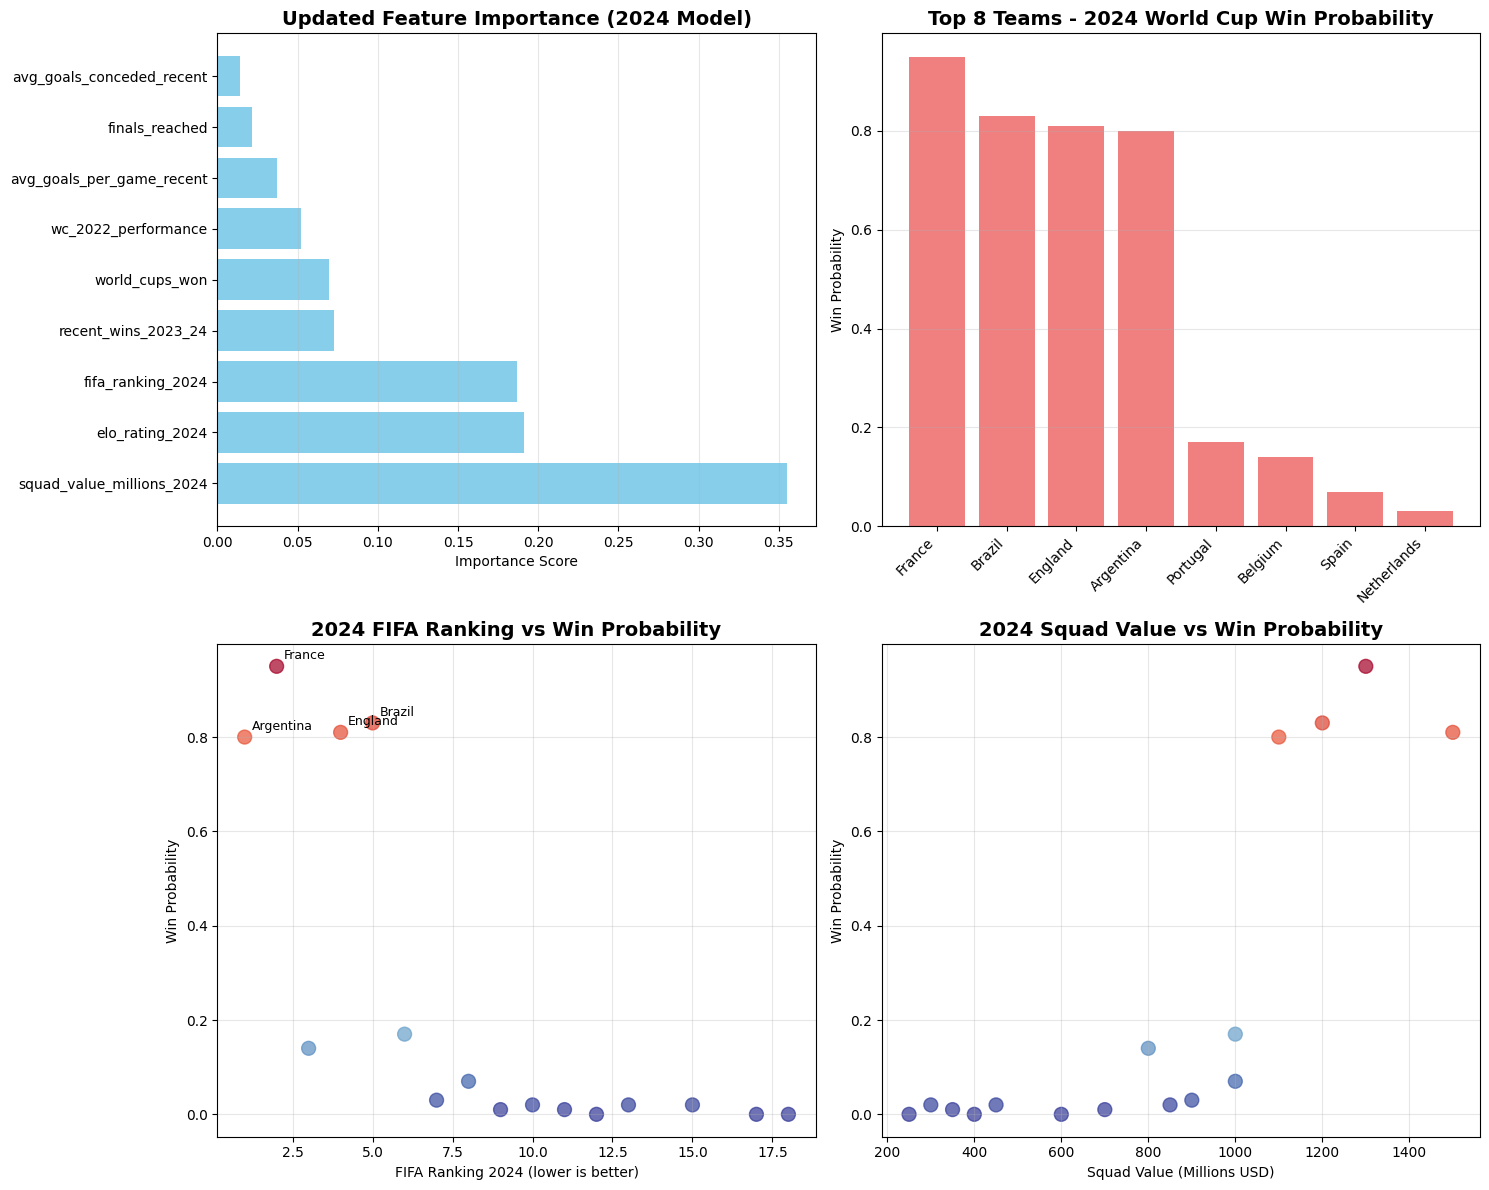


UPDATED WORLD CUP 2026 PREDICTION SUMMARY 
Most likely winner: France (95.0%)
Runner-up prediction: Brazil (83.0%)
Third favorite: England (81.0%)


In [21]:
# Create updated visualizations for the 2024 World Cup prediction model


plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))


ax1.barh(feature_importance_updated['feature'], feature_importance_updated['importance'], color='skyblue')
ax1.set_title('Updated Feature Importance (2024 Model)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Importance Score')
ax1.grid(axis='x', alpha=0.3)


top_8_teams_updated = results_df.sort_values('win_probability', ascending=False).head(8)
ax2.bar(range(len(top_8_teams_updated)), top_8_teams_updated['win_probability'], color='lightcoral')
ax2.set_title('Top 8 Teams - 2024 World Cup Win Probability', fontsize=14, fontweight='bold')
ax2.set_ylabel('Win Probability')
ax2.set_xticks(range(len(top_8_teams_updated)))
ax2.set_xticklabels(top_8_teams_updated['team'], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)


ax3.scatter(df['fifa_ranking_2024'], results_df['win_probability'], 
           c=results_df['win_probability'], cmap='RdYlBu_r', s=100, alpha=0.7)
ax3.set_title('2024 FIFA Ranking vs Win Probability', fontsize=14, fontweight='bold')
ax3.set_xlabel('FIFA Ranking 2024 (lower is better)')
ax3.set_ylabel('Win Probability')
ax3.grid(alpha=0.3)


for idx, row in df.iterrows():
    if results_df.iloc[idx]['win_probability'] > 0.7:
        ax3.annotate(row['team'], (row['fifa_ranking_2024'], results_df.iloc[idx]['win_probability']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)


ax4.scatter(df['squad_value_millions_2024'], results_df['win_probability'], 
           c=results_df['win_probability'], cmap='RdYlBu_r', s=100, alpha=0.7)
ax4.set_title('2024 Squad Value vs Win Probability', fontsize=14, fontweight='bold')
ax4.set_xlabel('Squad Value (Millions USD)')
ax4.set_ylabel('Win Probability')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("UPDATED WORLD CUP 2026 PREDICTION SUMMARY ")
print("="*60)
print(f"Most likely winner: {top_3_updated.iloc[0]['team']} ({top_3_updated.iloc[0]['win_probability']:.1%})")
print(f"Runner-up prediction: {top_3_updated.iloc[1]['team']} ({top_3_updated.iloc[1]['win_probability']:.1%})")
print(f"Third favorite: {top_3_updated.iloc[2]['team']} ({top_3_updated.iloc[2]['win_probability']:.1%})") 